In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
print sklearn.__version__
print sklearn

0.18.dev0
<module 'sklearn' from '/home/danielj/install/scikit-learn/sklearn/__init__.pyc'>


In [3]:
df = pd.read_csv('input/data_wness.csv', index_col='index')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951997 entries, 0 to 951996
Data columns (total 27 columns):
Run_Number           951997 non-null int64
Evt_Number           951997 non-null int64
triggerbit           951997 non-null int64
Evt_bbcZ             951997 non-null float64
clockcross           951997 non-null int64
Wness                949176 non-null float64
charge               951997 non-null float64
pT                   951997 non-null float64
pz                   951997 non-null float64
phi                  951997 non-null float64
eta                  951997 non-null float64
DG0                  951997 non-null float64
DDG0                 951997 non-null float64
DG4                  951997 non-null float64
chi2                 951997 non-null float64
DCA_z                951997 non-null float64
DCA_r                951997 non-null float64
dphi23               951997 non-null float64
dw23                 951997 non-null float64
Rpc1dca              951997 non-null float

In [4]:
print len(df)
print len(df[(df['pz'] < 0) & (df['charge'] == -1)])

951997
183002


In [5]:
df['charge'] = (df['charge'] > 0).apply(int)
df['arm'] = (df['pz'] > 0).apply(int)
df.head()

,Run_Number,Evt_Number,triggerbit,Evt_bbcZ,clockcross,Wness,charge,pT,pz,phi,...,dw23,Rpc1dca,Rpc3dca,fvtx_dphi,fvtx_dr,fvtx_dtheta,fvtx_dr_dtheta,fvtx_cone,rpc_awayclusters3,arm
index,,,,,,,,,,,,,,,,,,,,,
0,386773,2750910,2097152,-41.119637,3,0.000000,0,16.204479,42.891438,-1.434489,...,-0.022373,0.205724,30.410648,100.000000,-100.000000,-100.000000,10000.000000,6,0,1
1,386773,5732025,2097152,-33.974529,4,0.000000,0,58.412083,131.639618,3.001358,...,0.020225,0.055034,998.000000,100.000000,-100.000000,-100.000000,10000.000000,1,0,1
2,386775,543929,2097152,-18.632442,55,0.000000,0,17.766876,43.292278,-1.401690,...,-0.043223,1.122876,998.000000,100.000000,-100.000000,-100.000000,10000.000000,0,0,1
3,386775,805021,2097152,-58.694466,4,0.000000,0,17.077560,-24.988157,-2.925440,...,-0.004160,0.317762,998.000000,100.000000,-100.000000,-100.000000,10000.000000,0,0,0
4,386776,1107210,524288,5.341682,78,0.000718,0,19.280571,43.644257,2.211607,...,0.035007,998.000000,3.322567,0.056375,4.016472,0.059547,0.239168,11,0,1


In [6]:
grouped = df.groupby(['arm', 'charge'])
dfs = [[None for x in range(2)] for x in range(2)]
print dfs
for g in grouped:
    dfs[g[0][0]][g[0][1]] = g[1]
    
print dfs[0][0].shape

[[None, None], [None, None]]
(183002, 28)


In [7]:
dw23bins = np.linspace(-.3, .3, 30+1)
wnessbins = np.linspace(0, 1, 50+1)
hist = dfs[0][0].groupby([pd.cut(dfs[0][0]['dw23'], dw23bins), pd.cut(dfs[0][0]['Wness'], wnessbins)]).count()
hist['entries'] = hist['Wness']
hist = hist[['entries', 'pz']]
hist.reset_index(inplace=True)
hist.drop('pz', axis=1, inplace = True)
hist.fillna(0, inplace=True)

In [8]:
def convert_range_str(s):
    s = s[1:-1]
    low, up = s.split(', ')
    
    mid = (float(low) + float(up)) / 2
    
    return mid

hist['dw23_bin_center'] = hist['dw23'].apply(convert_range_str)
hist['wness_bin_center'] = hist['Wness'].apply(convert_range_str)
hist.describe()

,entries,dw23_bin_center,wness_bin_center
count,1500.000000,1500.000000,1500.000000
mean,28.040667,0.000000,0.500000
std,158.514116,0.173167,0.288714
min,0.000000,-0.290000,0.010000
25%,0.000000,-0.150000,0.250000
50%,1.000000,0.000000,0.500000
75%,12.000000,0.150000,0.750000
max,2249.000000,0.290000,0.990000


In [9]:
hist = hist[(hist['wness_bin_center'] > .1) & (hist['wness_bin_center'] < .9)]

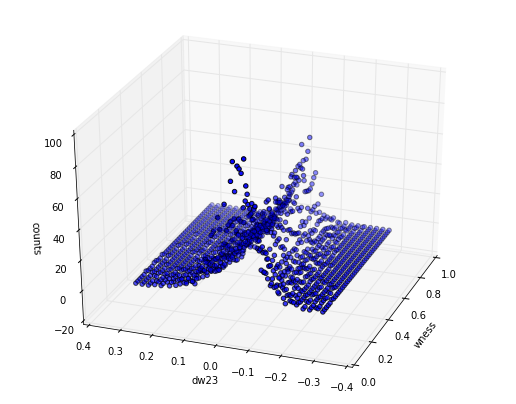

In [10]:
wness = hist['wness_bin_center'].values
dw23 = hist['dw23_bin_center'].values
entries = hist['entries'].values


plt.figure(num=1, figsize=(9, 7)) 
ax = plt.subplot(projection='3d')
ax.scatter(wness, dw23, entries)
ax.view_init(elev=30, azim=-160)
ax.set_xlabel('wness')
ax.set_ylabel('dw23')
ax.set_zlabel('counts')

In [11]:
df2 = hist[(hist['wness_bin_center'] > .1) & (hist['wness_bin_center'] < .3)].groupby('dw23_bin_center').agg(np.sum)['entries']
df4 = hist[(hist['wness_bin_center'] > .3) & (hist['wness_bin_center'] < .5)].groupby('dw23_bin_center').agg(np.sum)['entries']
df6 = hist[(hist['wness_bin_center'] > .5) & (hist['wness_bin_center'] < .7)].groupby('dw23_bin_center').agg(np.sum)['entries']
df8 = hist[(hist['wness_bin_center'] > .7) & (hist['wness_bin_center'] < .9)].groupby('dw23_bin_center').agg(np.sum)['entries']

print df2

dw23_bin_center
-0.29      1.0
-0.27      9.0
-0.25      3.0
-0.23      7.0
-0.21      8.0
-0.19     12.0
-0.17     23.0
-0.15     60.0
-0.13     81.0
-0.11    128.0
-0.09    224.0
-0.07    327.0
-0.05    532.0
-0.03    600.0
-0.01    479.0
 0.01    391.0
 0.03    282.0
 0.05    207.0
 0.07    129.0
 0.09     96.0
 0.11     49.0
 0.13     35.0
 0.15     21.0
 0.17     19.0
 0.19     14.0
 0.21      9.0
 0.23      5.0
 0.25      4.0
 0.27      1.0
 0.29      2.0
Name: entries, dtype: float64


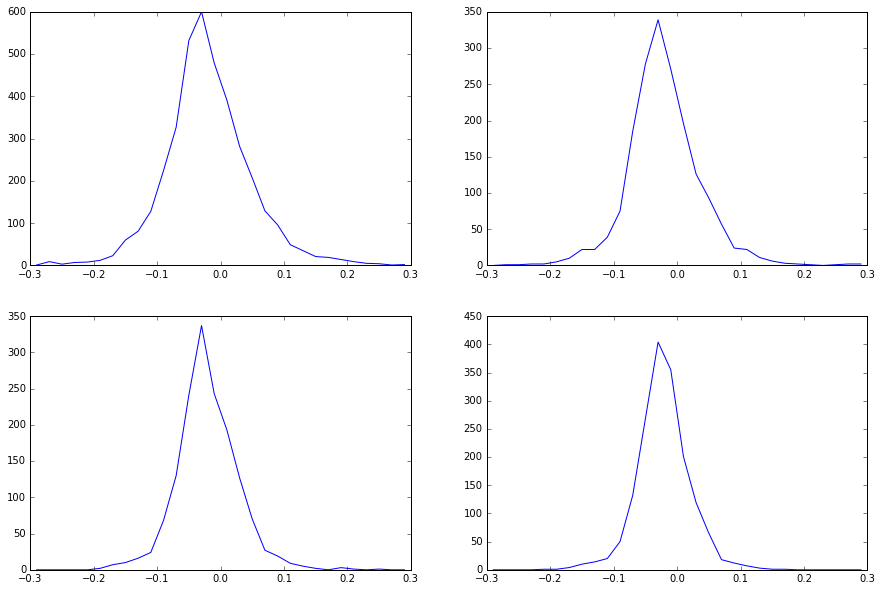

In [12]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0, 0].plot(df2)
ax[0, 1].plot(df4)
ax[1, 0].plot(df6)
ax[1, 1].plot(df8)


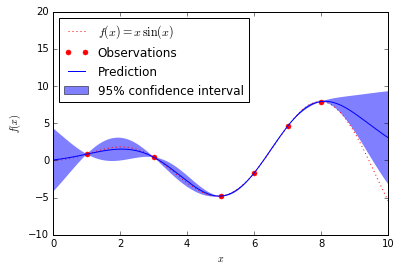

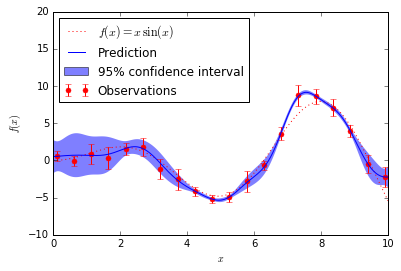

In [18]:
import numpy as np
from matplotlib import pyplot as pl

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

pl.show()

In [17]:
hist.head()
slice_sums = hist.groupby('wness_bin_center').agg(np.sum)

slice_sums.index


Float64Index([0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31,
              0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53,
              0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75,
              0.77, 0.79, 0.81, 0.83, 0.85, 0.87, 0.89],
             dtype='float64', name=u'wness_bin_center')

In [19]:


X = hist[['wness_bin_center', 'dw23_bin_center']].values
y = hist['entries'].values
dy = np.sqrt(y)

nugget = (dy / y) ** 2
inds = np.where(np.isnan(nugget))
nugget[inds] = 1.0


print X.shape, y.shape, dy.shape

n = 20

for i in range(0, len(nugget)/n):
    for j in range(0, n):
        print '%.2f'%nugget[j+i*n],
    print ''

(1200, 2) (1200,) (1200,)
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
0.50 1.00 1.00 1.00 1.00 1.00 1.00 0.50 1.00 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 0.50 1.00 1.00 0.50 1.00 1.00 1.00 1.00 1.00 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
0.50 0.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 
1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 

In [41]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Instanciate a Gaussian Process model

# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
kernel = RBF([.01, .01])

gp = GaussianProcessRegressor(kernel=kernel, 
                              alpha=nugget,
                              #normalize_y=True,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=array([ 1.,  1., ...,  1.,  1.]),
             copy_X_train=True, kernel=RBF(length_scale=[0.01, 0.01]),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [42]:
# .01 .01 (no norm)
kernel.theta

array([-4.60517019, -4.60517019])

In [40]:
# .01 .01
kernel.theta

array([-4.60517019, -4.60517019])

In [33]:
# .1 .01
kernel.theta

array([-2.30258509, -4.60517019])

In [25]:
# .1 .2 
kernel.theta


array([-2.30258509, -1.60943791])

In [34]:
print X.shape
x = []
for w in np.arange(.11, .9, .02):
    for d in np.arange(-.29, .31, .01):
        x.append([w, d])
        
        
x = np.array(x)
print x.shape

(1200, 2)
(2400, 2)


In [35]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

In [36]:
dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred, 'sigma': sigma})

df2p = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['entries']
df4p = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['entries']
df6p = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['entries']
df8p = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['entries']

df2ps = dfp[(dfp['wness'] > .1) & (dfp['wness'] < .3)].groupby('dw23').agg(np.sum)['sigma']
df4ps = dfp[(dfp['wness'] > .3) & (dfp['wness'] < .5)].groupby('dw23').agg(np.sum)['sigma']
df6ps = dfp[(dfp['wness'] > .5) & (dfp['wness'] < .7)].groupby('dw23').agg(np.sum)['sigma']
df8ps = dfp[(dfp['wness'] > .7) & (dfp['wness'] < .9)].groupby('dw23').agg(np.sum)['sigma']

'''
np.concatenate([X, X[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
        '''

"\nnp.concatenate([X, X[::-1]]),\n        np.concatenate([y_pred - 1.9600 * sigma,\n                       (y_pred + 1.9600 * sigma)[::-1]]),\n        alpha=.5, fc='b', ec='None', label='95% confidence interval')\n        "

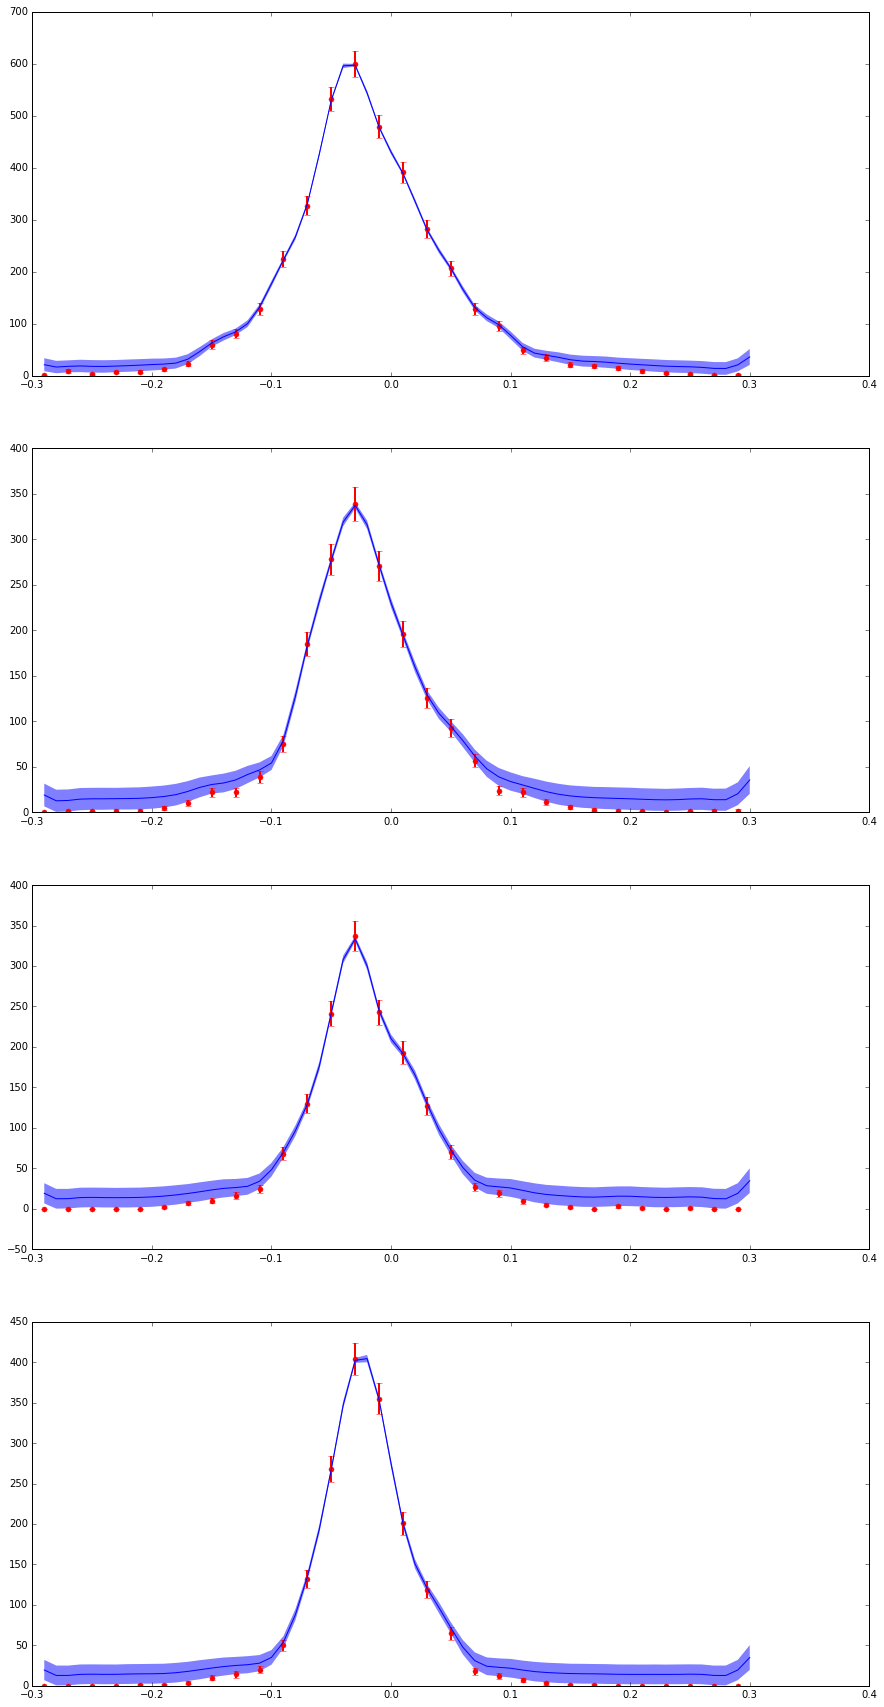

In [37]:
fig, ax = plt.subplots(4)
fig.set_figheight(30)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')

In [30]:
x = []
for w in np.arange(.1+.01, 1+.01, .02):
    for d in np.arange(-.3+.0025, .3+.0025, .01):
        x.append([w, d])
x = np.array(x)
y_pred2, sigma2 = gp.predict(x, return_std=True)

dfp = pd.DataFrame({'wness': x[:,0], 'dw23': x[:,1], 'entries': y_pred2, 'sigma': sigma2})
df9p = dfp[(dfp['wness'] > .92) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['entries']
df9ps = dfp[(dfp['wness'] > .92) & (dfp['wness'] < 1)].groupby('dw23').agg(np.sum)['sigma']

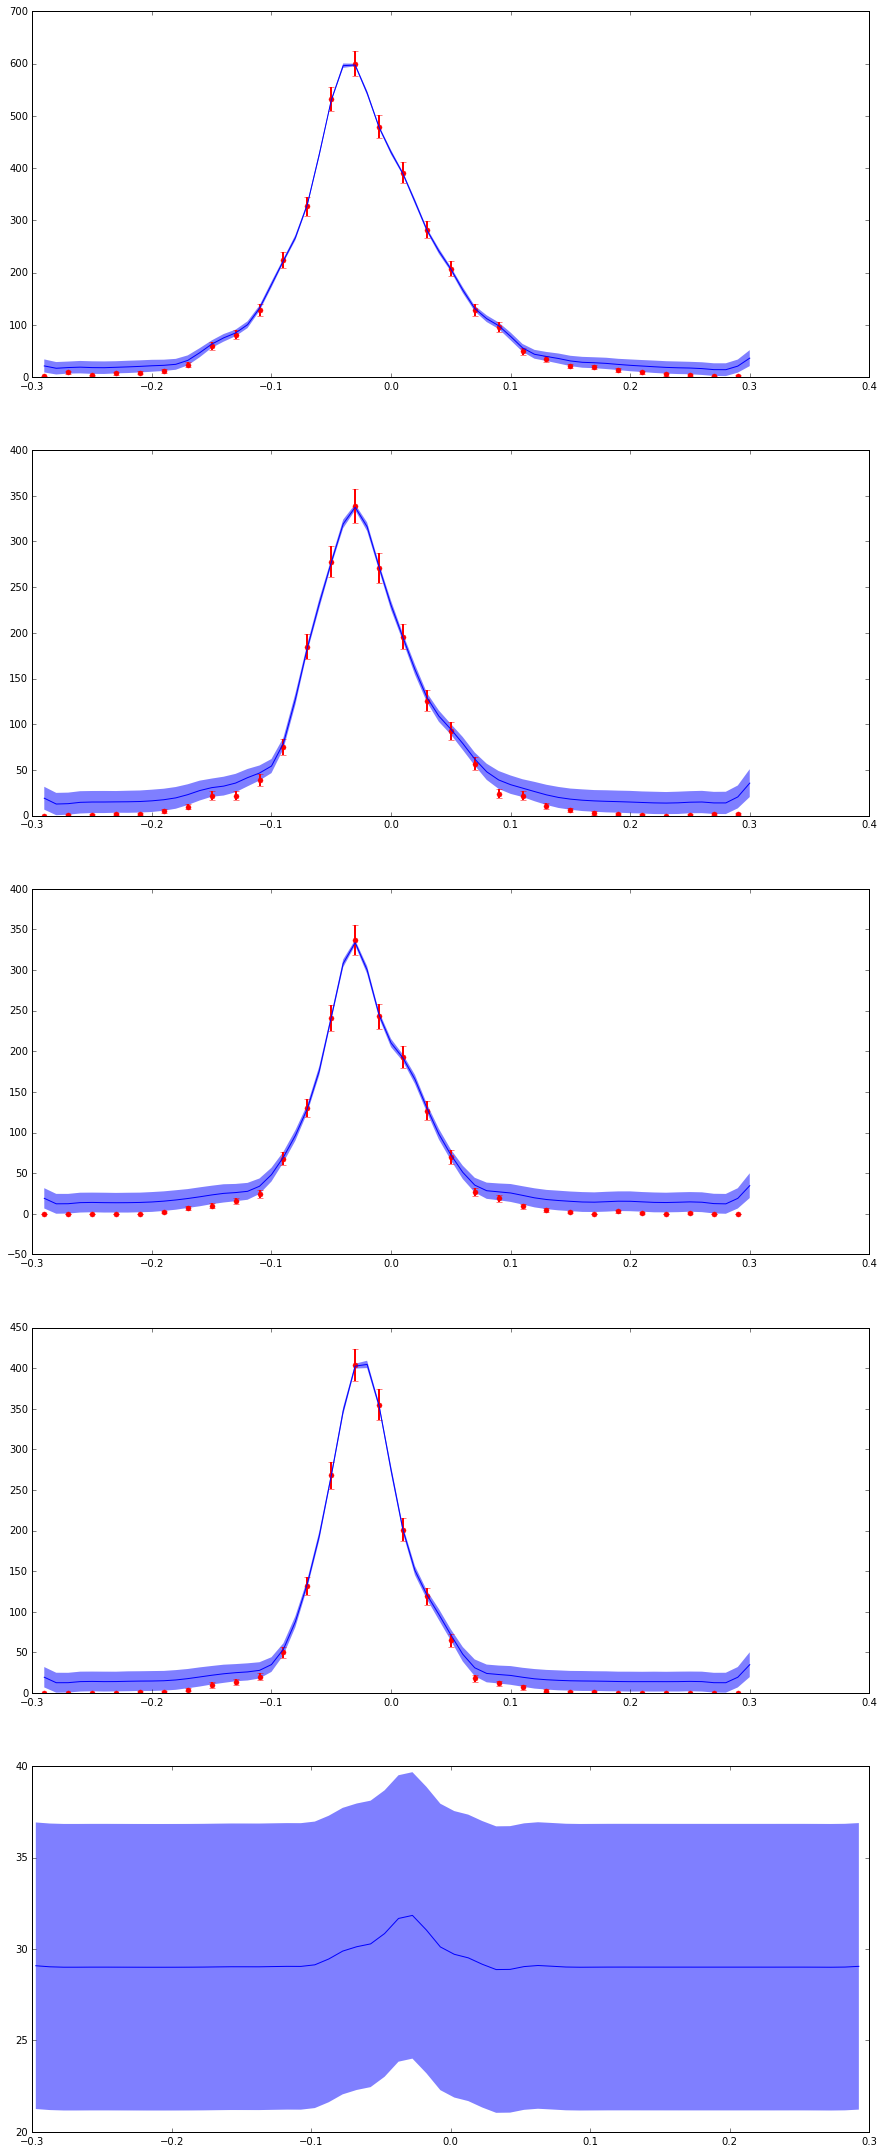

In [38]:
fig, ax = plt.subplots(5)
fig.set_figheight(38)
fig.set_figwidth(15)
ax[0].errorbar(df2.index.values, df2.values, np.sqrt(df2).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[0].plot(df2p)
ax[0].fill(np.concatenate([df2ps.index.values, df2ps.index.values[::-1]]),
              np.concatenate([df2p - 1.9600 * df2ps,
                       (df2p + 1.9600 * df2ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[1].errorbar(df4.index.values, df4.values, np.sqrt(df4).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[1].plot(df4p)
ax[1].fill(np.concatenate([df4ps.index.values, df4ps.index.values[::-1]]),
              np.concatenate([df4p - 1.9600 * df4ps,
                       (df4p + 1.9600 * df4ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[2].errorbar(df6.index.values, df6.values, np.sqrt(df6).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[2].plot(df6p)
ax[2].fill(np.concatenate([df6ps.index.values, df6ps.index.values[::-1]]),
              np.concatenate([df6p - 1.9600 * df6ps,
                       (df6p + 1.9600 * df6ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax[3].errorbar(df8.index.values, df8.values, np.sqrt(df8).values, 
                  fmt='r.', markersize=10, elinewidth=2, label=u'Observations')
ax[3].plot(df8p)
ax[3].fill(np.concatenate([df8ps.index.values, df8ps.index.values[::-1]]),
              np.concatenate([df8p - 1.9600 * df8ps,
                       (df8p + 1.9600 * df8ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')


ax[4].plot(df9p)
ax[4].fill(np.concatenate([df9ps.index.values, df9ps.index.values[::-1]]),
              np.concatenate([df9p - 1.9600 * df9ps,
                       (df9p + 1.9600 * df9ps)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')